<a href="https://colab.research.google.com/github/Khushgod/Movie-Genre-Classification/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # !pip install --upgrade pandas numpy scikit-learn tensorflow scikeras


In [2]:
import pandas as pd

In [3]:
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:  # FIXED: Use parameter instead of hardcoded path
        for line in file:
            parts = line.strip().split(':::')
            # Check if the line has enough elements to avoid IndexError
            if len(parts) >= 4:
                data.append({
                    'title': parts[1].strip(),
                    'genres': parts[2].strip(),
                    'description': parts[3].strip()  # Make sure 'description' is extracted
                })
            else:
                print(f"Skipping malformed line: {line.strip()}")
    return pd.DataFrame(data)

In [4]:
df = pd.DataFrame(load_data("train_data.txt"))
df

,title,genres,description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [5]:
with open("test_data.txt" , "r" ,encoding = "utf-8") as test_file:
  desc_test_list = []
  for line in test_file:
    parts = line.strip().split(":::")
    desc = parts[2].strip()
    desc_test_list.append(desc)
  pass

In [6]:
with open("test_data_solution.txt" , "r" ,encoding = "utf-8") as test_sol_file:
  genre_list = []
  for line in test_sol_file:
    parts = line.strip().split(":::")
    genre = parts[2].strip()
    genre_list.append(genre)
    pass
genre_list

['thriller',
 'comedy',
 'documentary',
 'drama',
 'drama',
 'horror',
 'drama',
 'comedy',
 'documentary',
 'drama',
 'drama',
 'drama',
 'drama',
 'drama',
 'short',
 'documentary',
 'comedy',
 'western',
 'documentary',
 'documentary',
 'short',
 'drama',
 'documentary',
 'documentary',
 'documentary',
 'documentary',
 'drama',
 'family',
 'sport',
 'horror',
 'western',
 'drama',
 'documentary',
 'comedy',
 'drama',
 'documentary',
 'drama',
 'romance',
 'war',
 'drama',
 'short',
 'game-show',
 'short',
 'documentary',
 'documentary',
 'documentary',
 'comedy',
 'comedy',
 'drama',
 'documentary',
 'drama',
 'drama',
 'comedy',
 'horror',
 'biography',
 'documentary',
 'drama',
 'adult',
 'comedy',
 'documentary',
 'short',
 'drama',
 'drama',
 'drama',
 'drama',
 'talk-show',
 'family',
 'documentary',
 'comedy',
 'comedy',
 'documentary',
 'drama',
 'drama',
 'drama',
 'short',
 'documentary',
 'horror',
 'drama',
 'comedy',
 'documentary',
 'documentary',
 'horror',
 'documenta

In [7]:
pip install scikeras

Starting pipeline fit...
Epoch 1/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - accuracy: 0.4493 - loss: 2.0059
Epoch 2/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7477 - loss: 0.8690
Epoch 3/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9035 - loss: 0.3557
Epoch 4/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9807 - loss: 0.1000
Epoch 5/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9974 - loss: 0.0218
Epoch 6/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.9993 - loss: 0.0092
Epoch 7/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.9993 - loss: 0.0060
Epoch 8/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9992 - loss: 0.0050
Epoch 9/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.9983 - loss: 0.0087
Epoch 10/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 46s 34ms/step - accuracy: 0.9971 - loss: 0.0113
Epoch 11/15
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.998

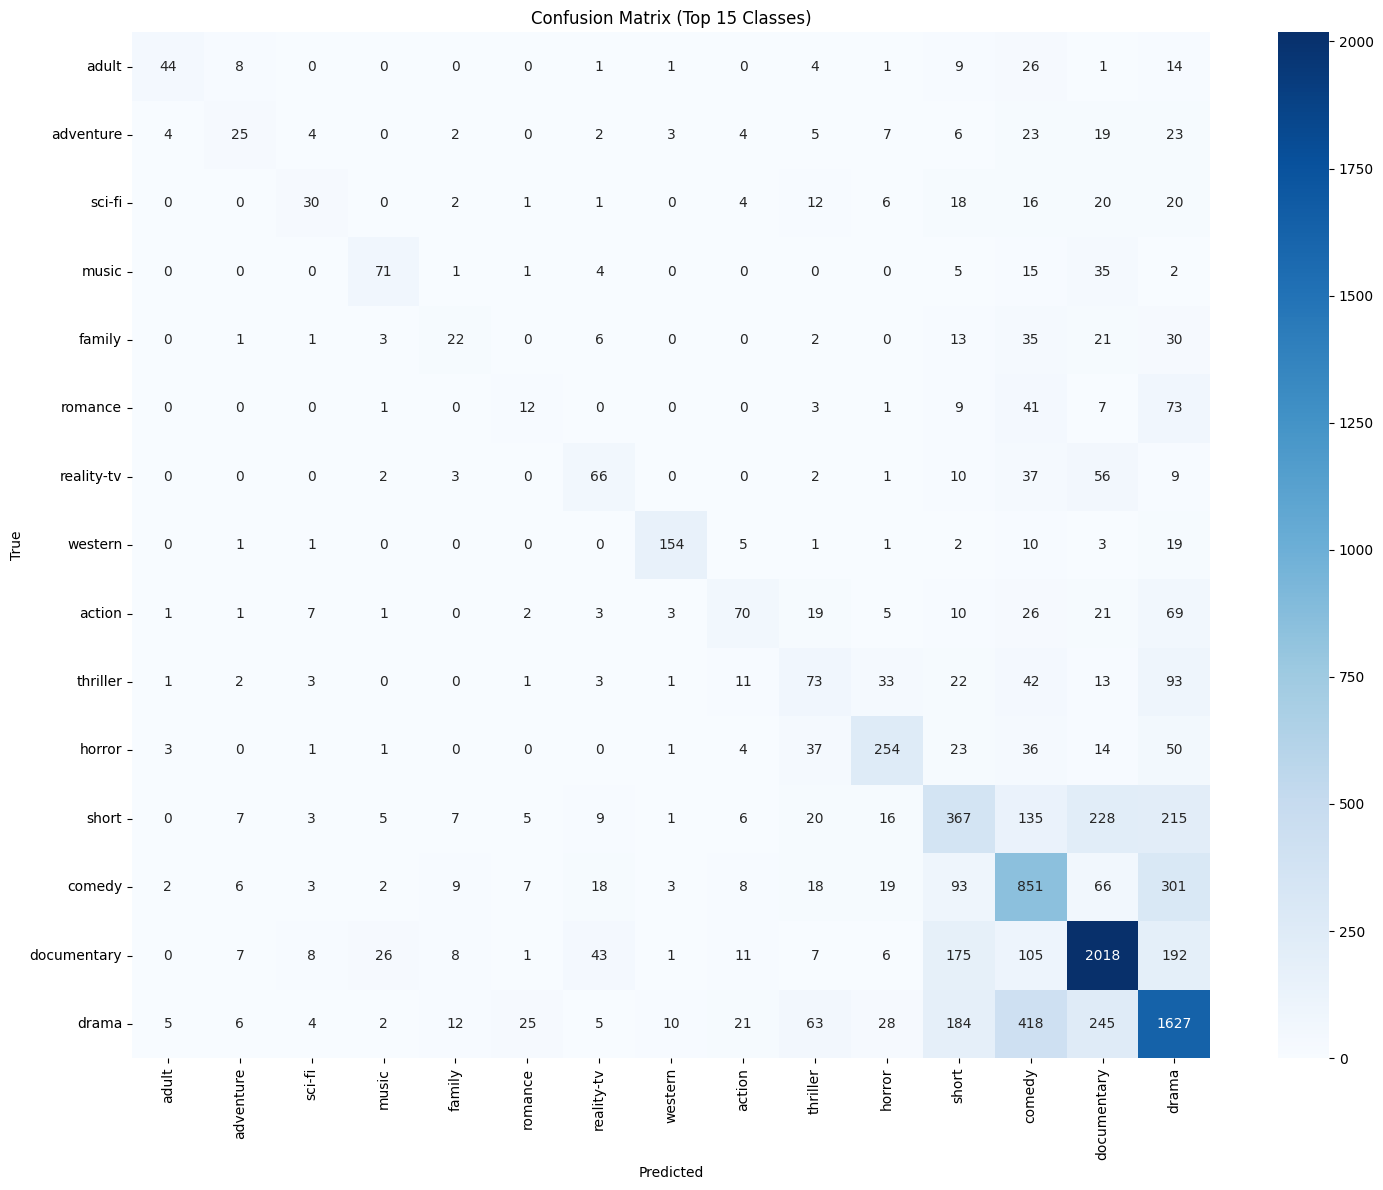

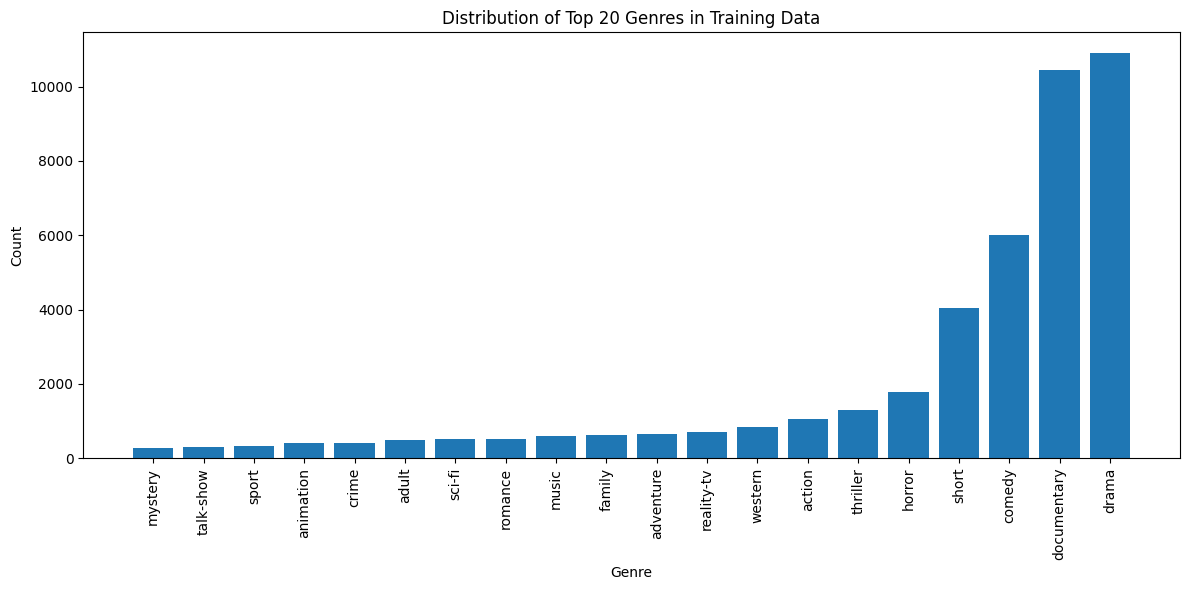

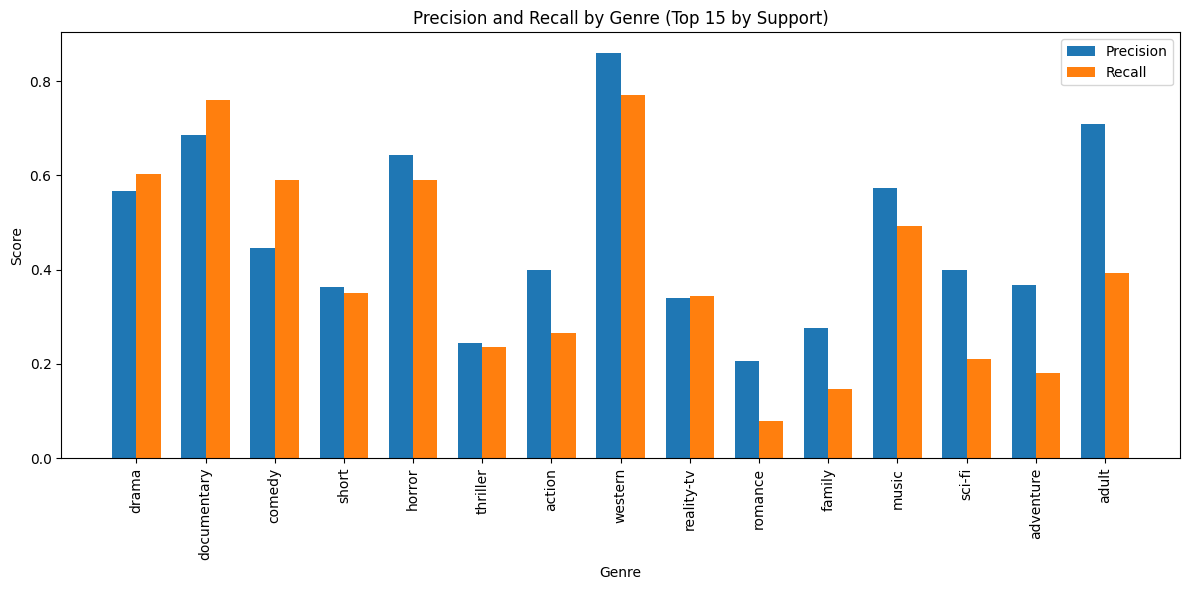

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split data into train and validation sets
X = df[['description']]
y = df['genres']
X_train, X_val, y_train_raw, y_val_raw = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Encode labels as integers (single-label)
le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)  # Fit on training data only
y_val = le.transform(y_val_raw)  # Transform validation data

# 3. Define model (Functional API)
def create_model(input_dim, num_classes):
    inputs = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(inputs)  # Increased neurons
    x = Dense(64, activation='relu')(x)  # Increased neurons
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

# 4. Configure KerasClassifier
keras_model = KerasClassifier(
    model=create_model,
    model__input_dim=25000,
    model__num_classes=len(le.classes_),
    epochs=15,  # Increased epochs
    batch_size=32,
    verbose=1
)

# 5. Build pipeline
text_transformer = TfidfVectorizer(
    max_features=25000,
    ngram_range=(1, 3),
    stop_words='english',  # Using English stop words, could also be a custom list
    strip_accents='unicode',  # Options are 'ascii', 'unicode', or None
)
preprocessor = ColumnTransformer(
    transformers=[("text", text_transformer, "description")],
    remainder='drop'
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", keras_model)
])

# 6. Train the pipeline
print("Starting pipeline fit...")
pipeline.fit(X_train, y_train)
print("Pipeline fit complete!")

# 7. Evaluate on validation set
print("Evaluating on validation set...")
# Transform validation data
X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)

# Get the Keras model
keras_model = pipeline.named_steps['classifier'].model_

# Predict using Keras directly
y_val_proba = keras_model.predict(X_val_transformed)
y_val_pred = np.argmax(y_val_proba, axis=1)

# 8. Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# 9. Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# 10. Visualize confusion matrix (top classes only)
plt.figure(figsize=(15, 12))
cm = confusion_matrix(y_val, y_val_pred)

# Find top 15 classes by frequency for better visualization
class_counts = np.sum(cm, axis=1)
top_indices = np.argsort(class_counts)[-15:]  # Get indices of top 15 classes
top_classes = [le.classes_[i] for i in top_indices]

# Create a smaller confusion matrix with just the top classes
cm_top = cm[top_indices][:, top_indices]

# Plot confusion matrix for top classes
sns.heatmap(
    cm_top,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=top_classes,
    yticklabels=top_classes
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Top 15 Classes)')
plt.tight_layout()
plt.show()

# 11. Class distribution visualization
plt.figure(figsize=(12, 6))
class_dist = np.bincount(y_train)
indices = np.arange(len(le.classes_))
top_20_indices = np.argsort(class_dist)[-20:]  # Get top 20 by frequency

plt.bar(
    [le.classes_[i] for i in top_20_indices],
    [class_dist[i] for i in top_20_indices]
)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Top 20 Genres in Training Data')
plt.tight_layout()
plt.show()

# 12. Per-class precision and recall visualization
report = classification_report(y_val, y_val_pred, target_names=le.classes_, output_dict=True)
genres = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Get top 15 genres by support
genres_by_support = sorted(genres, key=lambda x: report[x]['support'], reverse=True)[:15]

precisions = [report[genre]['precision'] for genre in genres_by_support]
recalls = [report[genre]['recall'] for genre in genres_by_support]

plt.figure(figsize=(12, 6))
x = np.arange(len(genres_by_support))
width = 0.35

plt.bar(x - width/2, precisions, width, label='Precision')
plt.bar(x + width/2, recalls, width, label='Recall')

plt.xlabel('Genre')
plt.ylabel('Score')
plt.title('Precision and Recall by Genre (Top 15 by Support)')
plt.xticks(x, genres_by_support, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 13. For any specific test data evaluation
if 'X_test' in locals() and len(X_test) > 0:
    print("\nEvaluating on test data...")
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
    y_test_proba = keras_model.predict(X_test_transformed)
    y_test_pred = np.argmax(y_test_proba, axis=1)
    y_test_pred_genres = le.inverse_transform(y_test_pred)

    # Print predictions with confidence
    for i, desc in enumerate(X_test['description']):
        # Get top 3 predictions with probabilities
        top3_indices = np.argsort(y_test_proba[i])[::-1][:3]
        top3_genres = [le.classes_[idx] for idx in top3_indices]
        top3_probs = [y_test_proba[i][idx] for idx in top3_indices]

        print(f"\nPrediction {i+1}:")
        print(f"Top prediction: {y_test_pred_genres[i]} ({top3_probs[0]:.4f})")
        print(f"Top 3 predictions: {list(zip(top3_genres, [f'{p:.4f}' for p in top3_probs]))}")